# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.) #this is random so not good
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

##############################################################################################################3
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose state = np.array([
                                                #pose.position.x, pose.position.y, pose.position.z,
                                                #pose.orientation.x, pose.orientation.y, pose.orientation.z, 
                                                #pose.orientation.w])
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task) #change this to another agent
done = False
##################################################################################################################
#####Save results by annotating with labels and in dictionary results
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
#################################################################################################################
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act() #agent acts
        _, _, done = task.step(rotor_speeds)# and then we apply send the agent's actions to task
        #write to file
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

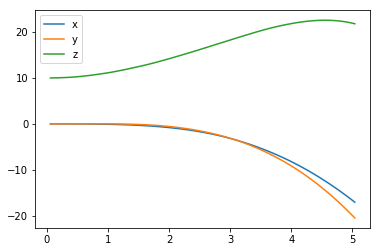

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()
#for takeoff, x and y don't need to move at all, z increases from 0
#for hover, you want z steady, x and y steady but start of z>0 
#for landing, x and y steady and z declines  

The next code cell visualizes the velocity of the quadcopter.

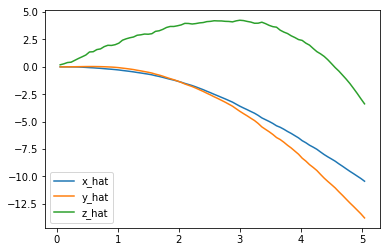

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

#Hover:  RPMs on 4 rotors equal, enough to get off ground but not to climb
#Ascent:  RPMs on 4 rotors increased simultaneously by equal amount
#Descent: RPMs on 4 rotors decreased simultaneously by equal amount
#Pitch: increase rear RPMs or decrease front RPMs (tilts copter so rotors are now pushing it fwd or bwd)
#Roll:  increase or decrease RPMs on either side 
#Yaw: increase RPM on opposing pairs of motors, ie. top left and bottom left to yaw left




Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

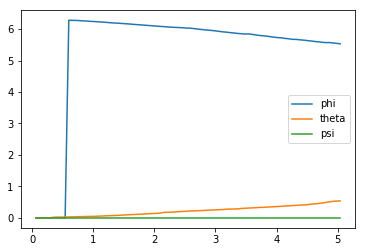

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()
###I think we want these as zero

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

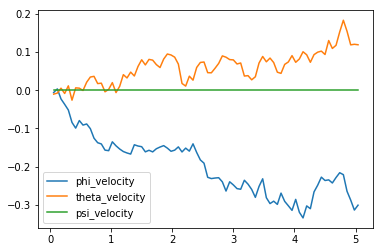

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

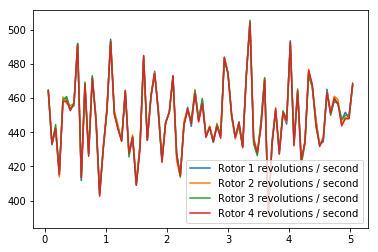

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-17.04944312 -20.47863234  21.80903175   5.52882279   0.54060443
   0.        ]
[-10.43193371 -13.78101983  -3.37278381]
[-0.30109393  0.11890529  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
#############basically repeat this cell to train agent
import sys
import pandas as pd
##########################################
from agents.policy_search import PolicySearch_Agent###################importing classes 
from task import Task

##########################################
num_episodes = 1000
target_pos = np.array([0., 0., 10.])#looks like a takeoff

task = Task(target_pos=target_pos)
######this has to change
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) # Choose action based on given state and policy
        next_state, reward, done = task.step(action) #Uses action to obtain next state, reward, done."""
        agent.step(reward, done) #save experience/reward
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.594 (best =   0.038), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [40]:
## TODO: Train your agent here.

#%load_ext autoreload
#%autoreload 2

import csv
import numpy as np
import sys
import pandas as pd

#imports from agent.py 
from agents.agent import DDPG
from agents.agent import Actor
from agents.agent import Critic
from agents.agent import OUNoise
from agents.agent import ReplayBuffer
#from task.py
from task import Task

num_episodes = 1000
runtime = 5.
init_pose = np.array([0., 0., 2., 0., 0., 0.])   #initial position
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 10.])            #target position
file_output = 'data.txt'                       # file name for saved results

#Setup
task = Task(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task)
done = False

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results=[]
results = {x : [] for x in labels}

##########################################################################################################
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        results = {x : [] for x in labels}
        plot_data = {x : [] for x in ['episode', 'total_reward']}    
       
        while True:
            rotor_speeds = agent.act(state)
            next_state, reward, done = task.step(rotor_speeds)
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) \
            + list(rotor_speeds)
            agent.step(action=rotor_speeds, reward=reward, next_state=next_state, done=done)
            state = next_state
            
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format( \
                i_episode, agent.score, agent.best_score), end="")  # [debug]
                all_results.append(results)
                plot_data['episode'].append(i_episode)
                plot_data['total_reward'].append(agent.total_reward)
                break
        sys.stdout.flush()
       





Episode =    6, score =   0.000 (best =    -inf)-2.2047848795635545
-6.226800259258263
-7.928834036691636
-9.317463924272705
-10.181951980363182
-10.785233030063608
-11.248597196923797
-11.62953204279056
-11.957303895531414
-12.250738002879679
-12.522572635922705
-12.779819808209616
-13.02981379945654
-12.170541385209646
Episode =    7, score = -12.171 (best =  -2.205)-4.200866670972783
-8.22164862478982
-9.9302893075672
-10.815498751787658
-11.377863434418895
-11.782598101608192
-12.109971365600543
-12.39592966840116
-12.657860115671854
-12.904496474094168
-13.144966286387262
-12.132885762521658
Episode =    8, score = -12.133 (best =  -2.205)-2.200680543695376
-6.734702143666935
-8.979007803577765
-10.173666727206866
-10.965943613530825
-11.560887815403591
-12.050047427011988
-12.473387105063075
-12.852486958949264
-13.213607978743918
-13.564162831171366
-13.900974798482563
-12.908592121676211
Episode =    9, score = -12.909 (best =  -2.201)1.8029506383867808
-1.2060070210101372
-4.9

-11.00283657115726
-10.414434419912716
Episode =   25, score = -10.414 (best =   5.872)4.81220746776313
4.837595426442885
4.867155810578318
4.896900160950183
4.920365398097026
4.9350434416182365
4.937508133379349
4.0517437765811835
2.7910167039066085
1.3573853299384744
0.3424682433929792
-0.35780423524429866
-1.0474453487474087
-1.660139968095042
-2.215107557744654
-2.6650954848896724
-3.0916772594967497
-3.6115367681882353
-4.1589877859951585
-4.0010383966954
Episode =   26, score =  -4.001 (best =   5.872)4.812212722149939
4.83374314334438
0.49997639777011926
-1.4555841622091354
-2.8671349246541102
-3.6739595470941935
-4.281873676601224
-4.771473335427668
-5.519603836082918
-6.443964944474352
-7.219665154412306
-7.884026875306559
-8.465731947971745
-8.981985601800435
-8.449853228347074
Episode =   27, score =  -8.450 (best =   5.872)4.812206163951438
4.84141755113161
4.880657146936239
2.660364958749799
-0.4752445843140499
-2.2421394088232915
-3.229257313240364
-3.7325520751866272
-3.

Episode =   47, score = -11.616 (best =   7.715)1.8055814093873148
-0.6937194970002281
-4.879227100757127
-7.000902979559051
-8.334845893971949
-9.299323383135421
-10.070573583515763
-10.735357785659339
-11.340667198455101
-11.913653255722004
-10.921502959747276
Episode =   48, score = -10.922 (best =   7.715)4.801189801795703
4.78957955562065
1.1007695414155527
-1.516304155273509
-3.9088192089244607
-5.532608372849869
-6.719273940270885
-7.626013416575155
-8.344562343630725
-8.93558905665149
-9.453104720554007
-9.921008871783215
-9.234777420107584
Episode =   49, score =  -9.235 (best =   7.715)4.812774185433513
1.825391673642573
-0.5029244022665402
-3.6787843706205825
-5.602986502750383
-6.907661231034003
-7.867185019030177
-8.60858335748286
-9.20949785797567
-9.512798430931575
-9.867875250943381
-10.266391502032965
-10.630315202720055
-9.942435545382908
Episode =   50, score =  -9.942 (best =   7.715)4.804606580174023
-1.6941778183101825
-5.5655176165886475
-7.5416727371061
-8.75631

Episode =   76, score = -12.047 (best =   7.715)-4.202095970745598
-8.724018994401622
-10.266474837743901
-11.080093660257988
-11.616560197155227
-12.028421162006326
-12.37891149289138
-12.69284718353681
-12.98145051087659
-11.78330545978893
Episode =   77, score = -11.783 (best =   7.715)-0.20268535468434878
-5.228865705715491
-7.929230883768452
-9.30347736880868
-10.150091974627612
-10.729899882217126
-11.162646348718258
-11.523416135336278
-11.83958792518711
-12.126687150408266
-12.398401305979945
-12.663794083018415
-11.766579153555458
Episode =   78, score = -11.767 (best =   7.715)3.7972353077046366
-3.2182295086895008
-6.584653153091689
-8.30519784353032
-9.370840522938028
-10.107183089050286
-10.660265111561875
-11.102533874081972
-11.475720946952963
-11.800914601769044
-12.090781772031034
-11.166549957695116
Episode =   79, score = -11.167 (best =   7.715)4.8026009803441605
-2.2150723708554945
-5.904681994955357
-7.769776862107034
-8.93270151608245
-9.75148073364993
-10.377054

-8.0816954810282
-9.217560434009515
-10.027343126514017
-10.655350442312894
-11.168812822250468
-11.609882806029534
-10.54889452542658
Episode =  105, score = -10.549 (best =   7.715)-2.2017929942824948
-7.714161686573943
-9.561460919993303
-10.511184576912044
-11.111534401284562
-11.55386208761825
-11.916265103666325
-12.23069158939613
-12.511879839653979
-12.772565509043398
-13.025294474872688
-12.02318660196663
Episode =  106, score = -12.023 (best =   7.715)-1.2007862866548726
-6.219656127727325
-8.584984225003552
-9.805548115407996
-10.384546724541972
-10.990972650526155
-11.47280429011684
-11.88127482601421
-12.24029403309275
-11.116264629783476
Episode =  107, score = -11.116 (best =   7.715)0.8001421045906252
-2.713586693552771
-4.25081078728999
-5.06495603694683
-5.596705360966682
-6.984454722886596
-7.7207014781974
-8.559961947319028
-9.1406181285048
-9.448858331412618
-9.749937446605585
-10.050668609108335
-10.506745663986354
-9.827692402273044
Episode =  108, score =  -9.82

-10.50638406033036
-10.964385311503888
-11.358310941639921
-11.712011819916512
-12.04068505362062
-11.120627965818903
Episode =  134, score = -11.121 (best =   7.715)-1.1968238094559167
-3.717949899396229
-5.587689311411352
-6.303468945968209
-6.56555349342252
-6.769773502606998
-7.088600250701263
-7.859165737612152
-8.595963557674262
-9.20587321624195
-9.72483826001034
-10.175198058691146
-10.568069030126297
-10.912746619925672
-11.217498483934035
-10.578904828688158
Episode =  135, score = -10.579 (best =   7.715)-1.1991796313773286
-7.22136473595616
-8.920467611993653
-10.054961521760653
-10.77682909061201
-10.80333809576968
-10.870506518292968
-11.341349819135731
-11.744921388406933
-12.103575713631868
-12.431443838011022
-11.47882351817677
Episode =  136, score = -11.479 (best =   7.715)-5.2042645950176745
-8.72979264273941
-10.263858882916958
-11.066619668966737
-11.591220252461765
-11.986308624626473
-12.30694945699995
-12.583785648414171
-12.839047724308706
-13.082814679168417


-10.85272318172058
-11.112844137777657
-10.334933050256298
Episode =  161, score = -10.335 (best =   7.715)-2.199088145361157
-4.213603955296057
-6.244883918149971
-8.024370782416794
-9.106341716739669
-9.845745675033285
-10.388320235063654
-10.810048884227973
-11.158927625819123
-11.460047175517385
-11.729593661781358
-11.982473267766906
-12.222635799608497
-11.421018956779319
Episode =  162, score = -11.421 (best =   7.715)-1.1964450730555
-0.7024402277133792
-4.546558087120696
-6.227679214988088
-6.847105270453307
-7.281405866118024
-7.770594112292138
-8.551910038986163
-9.200528773340556
-9.755561331121703
-10.2423596726714
-10.683190491909754
-11.090272128478173
-10.369538405015446
Episode =  163, score = -10.370 (best =   7.715)-1.2015168613852327
-4.736048347002256
-6.953270589199981
-8.607905148462535
-9.64303812429991
-10.37915822164918
-10.954014515939706
-11.43093730016355
-11.845617883295951
-12.216675256471198
-11.196977505882908
Episode =  164, score = -11.197 (best =   7

-9.340876367396453
-9.80914696615048
-10.214965822065295
-10.574969187105468
-10.915464903668342
-10.207217410549175
Episode =  188, score = -10.207 (best =   7.715)-1.201490980081318
-3.726507279624553
-6.25897851072929
-8.0349675765001
-9.119373867303372
-9.85900594261028
-10.401310772749584
-10.823612664725228
-11.174279237835393
-11.491935042467023
-11.792333429128966
-11.913745503006497
-11.074226618159845
Episode =  189, score = -11.074 (best =   7.715)-2.199243937462234
-5.222356746871343
-7.596037008976139
-9.04879130265731
-9.93155596237604
-10.549990819749029
-11.034347350235885
-11.440760935148452
-11.80854619046185
-12.152797235952052
-12.480346952089711
-11.523651372748901
Episode =  190, score = -11.524 (best =   7.715)-4.2028634871512205
-5.7401948880500875
-8.289226726187968
-9.593947244879608
-10.412986036623119
-10.996024640478657
-11.44946880800048
-11.828224589828125
-12.158016940662081
-12.452699998659643
-11.41154545332695
Episode =  191, score = -11.412 (best =  

Episode =  214, score = -12.100 (best =   7.715)-7.206284407264002
-10.22768777950736
-11.262027605521405
-11.817847079825492
-12.188228848277102
-12.468762217390834
-12.70227865106196
-12.90769298020044
-13.109525624659845
-13.324304628959633
-12.20391329905421
Episode =  215, score = -12.204 (best =   7.715)-7.206456919243577
-10.232573880433767
-11.292818157864266
-11.86215669160133
-12.241834213697867
-12.53941477526868
-12.795172456472804
-13.02480202975997
-13.24309117643215
-13.453244285478794
-13.652811777163953
-13.845503091620806
-12.857387469188437
Episode =  216, score = -12.857 (best =   7.715)-7.206445445492317
-10.228810818926082
-11.263047036600597
-11.814578786325521
-12.180644996365434
-12.451387620893167
-12.670169592757938
-12.853515516787297
-13.02558428252695
-13.198822576687405
-12.08983870607946
Episode =  217, score = -12.090 (best =   7.715)-7.206446211898198
-10.231383097909472
-11.280292809659167
-11.854000286311667
-12.24660404461767
-12.558759112909641
-12

Episode =  244, score = -12.022 (best =   7.715)-7.20638995928268
-10.229482435483835
-11.274743623889277
-11.848389203777813
-12.240281992847382
-12.550162323912154
-12.819063019362236
-13.074414041062624
-13.328821514470174
-12.095939363023158
Episode =  245, score = -12.096 (best =   7.715)-5.206390674775769
-9.23606237137734
-10.621034083578524
-11.112787591555087
-11.652777733455222
-12.058624956612213
-12.392126970673194
-12.676345561583268
-12.813582699346838
-12.748351329959016
-12.725928497612689
-12.655176637497556
-11.758624588459282
Episode =  246, score = -11.759 (best =   7.715)-7.206382286942654
-10.230127243452204
-11.276739754259237
-11.852048056818115
-12.244337241801343
-12.551841906937527
-12.819140690865122
-13.068973692537497
-11.727976615588886
Episode =  247, score = -11.728 (best =   7.715)-3.204724425886901
-7.241150012086186
-9.307877125437335
-10.383401923150121
-11.060604224697649
-11.546949879616944
-11.928139931825168
-12.237857476293975
-12.5148040222156

-12.871944841917774
-12.911176757088104
-11.82834250644373
Episode =  275, score = -11.828 (best =   7.715)-6.206482700153328
-9.72793929815336
-10.605634101680357
-11.341008341787697
-11.817129583766732
-12.162831126683804
-12.439457606192788
-12.686789589928916
-12.91339755726109
-13.119863656260794
-13.310473912530465
-13.410124529716088
-13.590426415434697
-13.759277517669654
-13.853308343683798
-13.88831290806764
-14.047700436999454
-14.197776005915259
-14.07919342903985
-14.131512089668885
-14.280029322469304
-14.238500452377531
-14.208230411067609
-13.657887477273126
Episode =  276, score = -13.658 (best =   7.715)-6.206506141054117
-9.729193572154543
-10.932597488747945
-11.581552418832855
-12.014549423871191
-12.34212413193334
-12.614851677051373
-12.869062682779884
-13.113193852222205
-13.344765187847944
-13.56558417797092
-13.782789390716287
-13.99543219958811
-13.067187042474673
Episode =  277, score = -13.067 (best =   7.715)-7.206223992154074
-10.226866368651804
-11.25913

2.7533349937672105
2.7009252794143515
2.4808537503586754
2.271103398520226
2.0653036342513307
1.8640466479997748
1.6587007908586195
1.4448391852038724
0.9933514909884139
0.783135645357652
0.5597002596821963
0.13509968768654013
-0.6306847515760468
-1.016960542180301
-1.2459324394865698
-1.9425427901795203
-2.610678415444648
-3.121694203080159
-3.7598504114205173
-4.384334831813967
-4.248961438541408
Episode =  297, score =  -4.249 (best =   7.715)-1.2011942974710554
-4.221636259657925
-6.611719772715645
-8.361099187731877
-9.475464068967145
-10.28894221132011
-10.946879138299206
-11.52331910913374
-10.354061430341101
Episode =  298, score = -10.354 (best =   7.715)-3.2015266620899117
-5.227829960265938
-7.625806399384949
-9.128542934499206
-10.089547000155461
-10.793697533349594
-11.369352628820973
-11.873661708604558
-12.332689122904226
-11.199420210613804
Episode =  299, score = -11.199 (best =   7.715)-2.2020541631797697
-4.225308014140182
-5.615701480279633
-7.365486957450933
-8.283

-11.10152220030653
-11.643861243644512
-12.057705030335446
-12.41220672351687
-12.740298966112652
-11.435821303211247
Episode =  308, score = -11.436 (best =   7.715)1.8030920368820484
3.3144906926020354
3.824367480421659
4.084761873325765
4.237432874205877
4.329485625680689
4.383983197253399
4.412787606910952
4.427613901583674
4.428740822021629
4.413409805763919
4.384957142392474
4.34840913737577
4.300153906422425
4.239360369739208
4.169191940649063
4.089635605436716
4.000176358642612
3.900101594218664
3.7911806211841794
3.672052552876954
3.544526013783933
3.1464158042131065
3.009886688190578
2.863365766552576
2.5926264808568145
2.09731488092332
1.8291298534906812
1.6618496970529633
1.2506129574277385
0.7781868555122657
0.4375403387758897
0.12627633459037202
-0.39573504309695645
-0.9115645458127499
-1.1993114084121532
-1.6562513206439882
-2.192162647119623
-2.7245553340550384
-3.1033172448168194
-3.633755367711557
-4.163530009905154
-4.692844710151698
-5.221676674658874
-5.75185905063

3.8839498845769955
3.94676788809421
4.009349579730803
4.073129509852884
4.138603445035986
4.20442983255456
4.270912472613528
4.3391446011345955
4.408980487285548
4.479205866483002
4.550807831487426
4.619091667443898
4.675634805682802
4.7203600543776405
4.755088740670486
4.780257909028723
4.795387557707272
4.801065240962792
4.7986711666023
4.788093182072501
4.768826501766548
4.742071390041549
4.708480182865101
4.667626933721758
4.619408391366317
4.565127521778849
4.504847490322663
4.4379855833786666
4.365088071982592
4.287046827549019
4.203574075687106
4.114201593545582
4.019941156418406
3.92111676791829
3.817230839436509
3.708272889410588
3.5952409858315146
3.4780359256302416
3.3560933612276793
3.2299817048627286
3.1003002890132394
2.9666969542279467
2.8288083688757117
2.6875271184406646
2.542992089490632
2.394699206615482
2.242759291212981
2.087950848335537
1.9300906572734466
Episode =  316, score =   1.930 (best =   7.715)-1.1995226672458918
-4.217320664548885
-6.930033640851353
-8.5

-7.819624334431915
-8.235784475398553
-8.572343060830368
-8.837568227889454
-9.268218080790412
-9.701112209209262
-10.064573832421013
-10.507814940059266
-10.955424598537158
-11.406920100693775
-11.863916509033086
-12.326992401916206
-12.795198505180966
-13.268936948594593
-13.749480237624931
-14.23691702009158
-13.977369627540766
Episode =  329, score = -13.977 (best =   7.715)-4.203228349337306
-6.730135700819526
-8.272304239484251
-8.822410101342843
-9.186530333423487
-9.800635107723949
-10.433540743042233
-10.96287575768204
-11.422235298380338
-11.838193983932783
-12.231864082653418
-12.611890197532382
-12.982107901131274
-13.349712531977337
-13.721581762919678
-14.097058641761821
-14.477356542032313
-14.866342979668527
-14.136535454422816
Episode =  330, score = -14.137 (best =   7.715)-1.2012954182666786
-4.719660423257209
-7.602686886612567
-9.087496906154303
-10.031195314457033
-10.726388124496685
-11.29494092816237
-11.797428445501614
-10.597714173779213
Episode =  331, score 

-11.30762390214425
-11.559895125586985
-11.943328765726992
-12.234748478416893
-12.444529981210156
-12.808024201418117
-13.200838838902236
-13.486839492726865
-13.78133125309936
-14.185241929471289
-14.590636334704106
-14.901521222295012
-15.291772090232174
-15.70848700674628
-16.10523584743673
-16.46268547877003
-16.891533397789907
-17.323147403783903
-17.737709586767334
-18.157575879092228
-18.601493902109073
-19.048810101957276
-19.50064312966156
-19.95671255386372
-19.605662321384763
Episode =  340, score = -19.606 (best =   7.715)-5.203106207788027
-7.7238489198886935
-9.259754887259982
-10.304074427421144
-10.95966456626778
-11.094224100672951
-10.636792435214417
-10.319628703350539
-10.223835214482836
-10.381678890971903
-10.274023544876004
-10.224801513082882
-10.527734483007
-10.750942894481677
-10.781806251080672
-10.910406655406941
-11.353383244598376
-11.671394073522315
-11.94137263258781
-12.32137976177581
-12.74754910502809
-13.07983231366298
-13.420892664508099
-12.90335

-15.716201189582243
-16.244724014265945
-16.72658583101936
-17.143823696071948
-17.656390842330058
-17.294295389235927
Episode =  352, score = -17.294 (best =   7.715)-4.202969693871031
-6.240695622735594
-7.984716072179722
-9.4278256884656
-10.375326911659515
-11.092966504221307
-11.696097264263738
-12.24308281191298
-10.993851388367094
Episode =  353, score = -10.994 (best =   7.715)4.80435731774125
4.81625045394913
4.812961641891893
1.7910079948583837
-0.06196965442948858
-1.348473840777925
-2.3275506304452236
-3.1286086436377643
-3.814016297696954
-4.625569447080503
-5.176908394741783
-4.828832695179968
Episode =  354, score =  -4.829 (best =   7.715)-1.1993928581247335
-2.7064787849227487
-3.5610373422120873
-3.0093956833666295
-2.6932250515603564
-1.4955239855759423
-1.0771518673184928
-0.5224901017561951
-0.33914411478126627
-0.013766653756692015
0.04518419989168277
0.14985705657404894
0.13640325863219577
0.10208701613562184
0.04552571503625895
-0.031046974606112332
-0.122548265

Episode =  367, score = -10.436 (best =   7.715)-3.2017674276017773
-6.22684239203023
-8.29125926088824
-9.633497270340285
-10.509981810719506
-11.171075030119106
-11.727032351500606
-12.2329697262791
-12.708474373386572
-11.537626936047914
Episode =  368, score = -11.538 (best =   7.715)-5.2030150051801405
-7.223871526068871
-9.26264056624616
-10.315744058645892
-10.98572359775099
-11.471069637385668
-10.984704001614343
-10.638662773503267
-10.736579172392466
-11.0493900280139
-10.88615435083788
-10.789423489413842
-11.127100322758176
-11.377975608177804
-11.363908738974596
-11.512780640758368
-11.911781938473863
-12.187524179863367
-12.25851927182068
-12.605651558409509
-12.998361200559145
-13.250940180258551
-13.471684823536389
-13.871665692330913
-14.229861526208026
-13.721020698276948
Episode =  369, score = -13.721 (best =   7.715)-1.1999014514960278
-4.226353588419029
-6.949650271416137
-8.61144964171977
-9.659203694379366
-10.410978477244234
-11.00362803795511
-11.4990591359995

Episode =  382, score = -10.714 (best =   7.715)1.8027291191381631
3.311114944309412
3.8143642861080864
4.047081815393065
4.165071691195716
3.8855856079562248
3.5042193887207893
3.173357862282016
2.8720144789086994
2.5922901387469772
2.3201291239095054
1.7972847231265774
0.849830407150982
-0.003875900388073918
-0.18932496405865054
-0.960479625222889
-1.6840338961972439
-2.371169192628317
-3.032501474090816
-3.6737547135685586
-3.5464330605414847
Episode =  383, score =  -3.546 (best =   7.715)-5.203759322323452
-8.229862339996272
-9.948339414613757
-10.864543647116665
-11.47651629127501
-11.949516866537252
-12.362067638427622
-12.752749745753857
-11.446888662892317
Episode =  384, score = -11.447 (best =   7.715)-2.2010323995626497
-4.213427188827173
-7.252258609595404
-8.804774190643236
-9.7782707692167
-10.485905772651288
-11.058577372782196
-11.561996752426715
-10.388441557712635
Episode =  385, score = -10.388 (best =   7.715)-3.201862464020334
-3.714047015128358
-4.228792642994509

Episode =  396, score = -10.320 (best =   7.715)-4.202986204641034
-5.72383849137756
-5.584035863501434
-6.023149742560099
-6.304485028036334
-6.510598827469308
-6.246450255221755
-5.311100448849291
-4.926665557198387
-5.2356706516453375
-4.6879012110166585
-4.255651428097019
-4.145669444699742
-4.072030073028919
-3.830799606819869
-3.644240421600194
-3.855155273581792
-3.7293641583225416
-3.6398098083907087
-3.582486148101985
-3.6943067192483827
-3.6802122249312106
-3.6901266167244273
-3.84638452077071
-3.849996014525079
-3.913113152112528
-3.956809230735987
-4.018445609124283
-4.095611621492411
-4.155964913555301
-4.266463002671016
-4.358936577034293
-4.526712338836574
-4.6180465833692255
-4.81111953942629
-4.957620308544164
-5.144136723222427
-5.342380996423723
-5.551102332615927
-5.769286425168551
-5.973718684497327
-6.237429726136082
-6.509022436228306
-6.7887291723838326
-7.07745466670806
-7.440008774082583
-7.7433451089086995
-8.055099463119413
-8.37570114860097
-8.8243372036103

-3.3775929204093313
-4.006314397645891
-4.610835861400733
-4.410233869100692
Episode =  404, score =  -4.410 (best =   7.715)0.8013094394459421
2.803496698428086
3.476060129518224
3.8143922412908795
3.011046963121816
3.1279274310833673
3.33620171823089
3.466158861903723
3.5394073737309224
3.574844544020155
3.5845747693628156
3.568920893786552
3.5324441203688344
3.482161052102699
3.4193062924349777
3.342376335867342
3.2540319323299807
3.1582302371040267
3.0528993412307988
2.9376632976115102
2.814994748443462
2.686371245294945
2.549403480366005
2.4045655034060793
2.25429332490433
2.0979185523365422
1.9340166560566017
1.763569843624884
1.588388541448097
1.4067103596039015
1.2181118793469201
1.0240032212608354
0.8249109283315269
0.6191738113989915
0.40699177499912387
0.18994525404517967
-0.03273413503923412
-0.2619988768834206
-0.49719489613037
-0.7371848881746524
-0.9833419581351047
-1.2359709068995548
-1.4940115760271921
-1.757291305397294
-2.027008341743684
-2.3030431131979587
-2.584202

Episode =  412, score = -14.766 (best =   7.715)-5.202029116604313
-6.718049800825767
-8.586694489476049
-9.818276133207384
-10.6157348624233
-11.210775856830997
-11.694390425067644
-12.129111421757948
-12.536545750082459
-12.931849975067546
-11.847136340970497
Episode =  413, score = -11.847 (best =   7.715)-4.202834614113892
-6.224496661515177
-8.596881589294524
-9.823611826715448
-10.610163079397172
-11.188272918388948
-11.644289322729923
-12.027601234592016
-12.371754071388558
-12.69869641336
-13.01341952923741
-13.32250975136926
-13.634595732507977
-12.732124608757406
Episode =  414, score = -12.732 (best =   7.715)-1.1999803769391235
-3.7164779477661365
-4.924269240563216
-6.56582396906983
-8.001058321804328
-9.016777169057299
-9.525809008667554
-10.231016795187756
-10.847233929740623
-9.86251053676656
Episode =  415, score =  -9.863 (best =   7.715)-2.2031006164325233
-7.744786969535396
-9.655924859553451
-10.679957126729652
-11.36029114754896
-11.88164765524129
-12.335548521012

0.3289020314053268
0.4052518512627183
0.4652126322586288
0.5119620599746794
0.5486269831019915
0.5740520690705426
0.5891546022453643
0.5965540830165935
0.5970992722292404
0.5895715864630031
0.5751489439275969
0.5559841659422419
0.531239150582203
0.5004825049282264
0.4650624119016675
0.4262084051341348
0.3824981027205444
0.33419786918913075
0.28279050746122475
0.22824529829599313
0.16951865345523429
0.10726217680002674
0.04278309678056939
-0.024908711675942472
-0.09615535340664057
-0.17003873801929367
-0.2459432498423136
-0.3250561862404218
-0.4072044593838654
-0.491305065068687
-0.5776769866935686
-0.6670889622276472
-0.7590605392695599
-0.8526862592388427
-0.9489093344703237
-1.047961252103596
-1.1491122187479643
-1.2520732723946788
-1.3578005949906988
-1.4721747265920497
-1.5970794665061836
-1.7326983803669749
-1.8794022328734286
-2.036369117228594
-2.202753046088568
-2.379028912508977
-2.565345568248054
-2.7605556721140574
-2.964498774699859
-3.1776841412068806
-3.3998463140387187
-

-5.641525624425623
-5.569365189716614
-5.082212632732431
-5.065741070827715
-4.682602827359899
-4.523795471213315
-4.2179822854021225
-3.949300838709572
-3.71073268236714
-3.4960026496782013
-3.1662942486742343
-2.868891905151328
-2.5975867891060154
-2.348243943622975
-2.12016066104456
-1.9110257749811423
-1.7170146162888376
-1.5364510314974538
-1.3698864417409964
-1.2147372406012094
-1.0687873441549178
-0.9320132709287384
-0.8045617572474163
-0.6841025934221455
-0.5695094222193159
-0.46173501275822576
-0.35994238300383546
-0.2624690385247816
-0.16910660885188133
-0.08084241531883168
0.0037612015210373374
0.0856981195892997
0.16434399953133436
0.23945990413738744
0.3124275108449153
0.3836626659028836
0.4521087850070575
0.5184021142479083
0.5770444922644291
0.6223777289756819
0.6541320353957094
0.6738436156062825
0.6824156444724068
0.679555115611979
0.6653509456453494
0.6413878832489273
0.6078429672483933
0.5642429673278373
0.5113158206011454
0.45015044803947873
0.3805045282380193
0.302

-7.213703467747909
-7.585495077687392
-7.9639812538549055
-8.349929346254266
-8.74306012235012
-9.142572549278377
-9.549433653392239
-9.964073471754318
-10.385802740586232
-10.814457548083453
-11.250970851634646
-11.789239510018257
-12.377878891599522
-12.833612012018673
-13.342532033531501
-13.9465621978731
-14.554274608275561
-15.038116859802518
-15.615416485853261
-16.240345977578148
-16.870074508691175
-17.505601097325496
-18.147280394690434
-18.794381105287655
-18.563285246777426
Episode =  445, score = -18.563 (best =   7.715)-5.201813294500786
-5.214299489103442
-6.235973717290581
-8.024373189636679
-8.94642347294409
-9.45103708483507
-9.731987106960375
-10.008130101724571
-10.282675670000653
-10.566654554839344
-9.696958686217586
Episode =  446, score =  -9.697 (best =   7.715)-5.201651542861251
-4.714351918677153
-5.902025462228491
-5.520578583260249
-6.922882335195766
-7.224468267020427
-7.338079497837773
-7.473315127049413
-7.732522296425076
-7.978263171314124
-8.12864955833

-7.357127677299357
-7.735003396254253
-8.120744153492266
-8.627485518340782
-9.081219120398941
-9.486025301940428
-9.952703658174924
-10.530563813968833
-11.058498278411522
-11.48959135477654
-12.029424522610991
-12.623006809123199
-13.171491755818737
-13.678271673856164
-14.286340097665049
-14.898195529371959
-15.514756743472581
-16.136824168668785
-16.76412800469792
-16.535662381441426
Episode =  462, score = -16.536 (best =   7.715)-3.2023385186489386
-4.221564878639144
-5.269033628592041
-6.08587805461452
-6.6324534602432506
-6.893173535517881
-7.147439490660345
-7.408005341407636
-7.674180120930954
-7.953971652954034
-8.253440128153159
-7.648986784140395
Episode =  463, score =  -7.649 (best =   7.715)-1.200178282972955
-5.724175531752462
-8.278882394758137
-9.598824395502568
-10.43838146884924
-11.050913080584069
-11.553774714993581
-12.000464689266531
-10.778190834903583
Episode =  464, score = -10.778 (best =   7.715)4.805019529075837
4.812858340140193
4.813092001023768
4.82080

-6.454693997762855
-6.373030110207723
-6.3728820813205465
-6.262788098304449
-6.29345088340028
-6.21649896418272
-6.274523002919397
-6.286924651239669
-6.312037035136127
-6.349653758317576
-6.400038120652329
-6.462036133299073
-6.48206210471325
-6.566434043958549
-6.6108042461728
-6.66636002169078
-6.732714813128728
-6.810139885609073
-6.8981259849053735
-6.995554344600213
-7.102447449505405
-7.219102230657554
-7.344549866415569
-7.478232150486563
-7.620395161734783
-7.771056994858027
-7.929165861533047
-8.0946237926886
-8.267793784289946
-8.448220872184748
-8.635166199903155
-8.828790748609315
-9.029390200016927
-9.23615398048209
-9.448786059540426
-9.667596321976955
-9.892560927718028
-10.122871461420248
-10.358561124304444
-10.599997775789863
Episode =  472, score = -10.600 (best =   7.715)-2.2004861528248756
-1.7055465379609422
-2.2110793368357604
-1.220739036050767
-0.0292088088764924
-0.23746501497146286
-0.8183867425859155
-1.2588268939414307
-1.7241354477006265
-2.0091135114749

Episode =  487, score = -10.909 (best =   7.715)-3.2017130229739137
-5.214518941275239
-6.902645625749351
-7.5094747440010075
-8.688859678977085
-8.825180271454705
-8.213891138821841
-8.132320829936738
-7.867968541989715
-7.876418031098129
-7.81301865377817
-7.7860006798584465
-7.863859695116878
-7.95189747066096
-8.051405814578908
-8.16462898866016
-8.287445393670323
-8.418906825907428
-8.561475280978165
-8.714938259844377
-8.924067610067263
-9.091888644875105
-9.270719671824414
-9.50021071815008
-9.734037383503015
-9.93541060261712
-10.147025725042965
-10.473663478758622
-10.697147249564841
-10.930266348907724
-11.204651284825713
-11.546886732810044
-11.800521680281198
-12.063674114955443
-12.448958602877132
-12.779518417680155
-13.061456265986077
-13.352202476700317
-13.803902969921783
-14.105116703608482
-14.414946164813337
-14.803958224399414
-15.242862460933315
-15.570249469142567
-15.905932317585162
-16.37890037203696
-16.789045286622425
-17.141639488723957
-17.542590989974002
-

-12.022054335649763
-12.343917313336169
-12.650856638543651
-12.943298892093928
-11.748969002884536
Episode =  502, score = -11.749 (best =   7.715)0.7969896030071015
-6.249389448544072
-8.658542044476837
-9.90052959764181
-10.684073409065023
-11.245939222571373
-11.698289601022102
-12.092436935916055
-10.859943943036493
Episode =  503, score = -10.860 (best =   7.715)0.7981125333438266
-3.7532159081922356
-6.338453330828252
-8.182346816715857
-9.337783359830208
-10.156365800294717
-10.805544978720619
-11.360926486882867
-10.209712432784771
Episode =  504, score = -10.210 (best =   7.715)-0.20302397480391976
-6.74900366153211
-8.990065745411906
-10.158064634229168
-10.901465709094289
-11.43637631280499
-11.839512821000685
-12.150539043434812
-12.41369314292872
-12.652048778955756
-11.592771617232506
Episode =  505, score = -11.593 (best =   7.715)0.7971000131348722
-6.251670876338185
-8.6642892191352
-9.676042265566243
-10.529476099802013
-11.140683150489714
-11.60018282135171
-11.2107

Episode =  534, score =  -9.492 (best =   7.715)0.7980489043536543
-3.754157642145624
-6.3409953248452355
-8.182260542855673
-9.333764207879138
-10.147966891637058
-10.788552335102759
-11.327631168305663
-10.180116594049478
Episode =  535, score = -10.180 (best =   7.715)0.7975770980047812
-4.753532199787409
-7.6724209381358
-9.181541745758587
-10.135078362336833
-10.818339409916282
-11.370262199033116
-11.852793333702623
-10.646927407735665
Episode =  536, score = -10.647 (best =   7.715)-0.20303891276715724
-6.747122439548164
-8.979681547854165
-10.144449975341269
-10.885492799301812
-11.418161456174985
-11.816819678398842
-12.124140615719826
-12.27217873431802
-12.520341254101657
-12.745577434728501
-12.95329642468604
-12.033812084325575
Episode =  537, score = -12.034 (best =   7.715)0.7990214032808498
-3.24862753779092
-4.989015034861343
-6.670239849417707
-8.135152825758235
-8.83165090934294
-8.81991385217886
-9.134628662151378
-9.897021143989209
-9.007319029590288
Episode =  538

-12.169787054161793
-12.456441860464396
-12.702937263759479
-12.914261652768268
-13.10959450821817
-13.305005537161236
-13.497132856998448
-12.535814944921643
Episode =  566, score = -12.536 (best =   7.715)-5.200640921402249
-9.227225765952824
-10.613575057510927
-11.33887691582994
-11.804580057979583
-12.144396940734516
-12.258192063999442
-11.718138226603767
-11.85817678134179
-12.09542077715718
-12.307635569371092
-12.506924432441792
-12.706649194132401
-11.870459965980087
Episode =  567, score = -11.870 (best =   7.715)-5.202502084280853
-9.232098723130221
-10.624500478522002
-11.357982418002019
-11.832426998867987
-12.181203497633433
-12.303807120204084
-11.784153136736439
-11.969658875471223
-12.252452519132806
-12.507979114960357
-11.548980855380327
Episode =  568, score = -11.549 (best =   7.715)0.7974249019751785
-5.7547535972229555
-8.006789553164031
-9.182029624205473
-10.13132622308426
-10.804948990213175
-11.309294897239104
-11.695192173281203
-12.004430974661275
-12.2748

-5.25466888652499
-8.008579452212516
-9.429812921232298
-10.324239130700153
-10.960219922700853
-11.445901297189337
-11.82803358213516
-12.146699191704618
-11.032029272534157
Episode =  596, score = -11.032 (best =   7.715)-4.203019674280508
-8.743368241879004
-10.306424908711723
-11.118292317735373
-11.636079072556772
-12.014223280065082
-12.337793814573876
-12.643346939854116
-12.930917459145352
-11.737825713230816
Episode =  597, score = -11.738 (best =   7.715)0.7991102202900082
-3.2533682300866738
-5.340230234251087
-7.42844192670354
-8.72538441820214
-9.632678187623734
-10.323890016002634
-10.875902831272859
-11.327485351451209
-10.294736816306088
Episode =  598, score = -10.295 (best =   7.715)0.7984758705769628
-3.7538082102337658
-6.340448384291011
-8.185627418283506
-9.342319001055698
-10.162338432464244
-10.81395755919221
-11.374278913361849
-10.221581256321643
Episode =  599, score = -10.222 (best =   7.715)-5.202784757770468
-9.235769555509311
-10.62242969369412
-11.345868

-13.034894794560454
-13.288491386623747
-13.54423538515514
-12.498882436392213
Episode =  628, score = -12.499 (best =   7.715)4.807724194861346
4.79637373557858
3.455336937731605
0.7581164433702394
-0.8871092984889948
-1.51178967805808
-0.7006130657328684
-1.630531443747626
-2.4029453483031036
-3.062063436434566
-3.6355099294553592
-4.155681649077894
-4.87234931019726
-5.453339404800677
-5.861395020059471
-6.513513627287788
-6.189189296270859
Episode =  629, score =  -6.189 (best =   7.715)0.7971767737991606
-6.252432502048983
-8.667899937503217
-9.91617063351255
-10.704353984340722
-11.267073604403421
-11.697640575258532
-12.053830244493973
-12.375735294067233
-11.238161764660509
Episode =  630, score = -11.238 (best =   7.715)0.8004135536725894
-3.2478794253808836
-4.9933422882153655
-6.9131647227024065
-8.111615688151511
-9.123264871221082
-9.90663061725866
-10.5565756711913
-11.109275346723738
-10.098347812051363
Episode =  631, score = -10.098 (best =   7.715)-5.201181849074263
-

-12.989561414320484
-13.2312506396336
-12.119318763303273
Episode =  659, score = -12.119 (best =   7.715)0.7973955722861925
-5.2532783529522415
-8.004856163340811
-9.425207178477217
-10.321215631468842
-10.96189214454641
-11.470702215259681
-11.89848873163485
-10.687545539230978
Episode =  660, score = -10.688 (best =   7.715)0.7973666090509521
-5.252501547946779
-8.003344520594764
-9.429618189689329
-10.334934648510998
-10.987449503077222
-11.518657865570601
-10.203825632374276
Episode =  661, score = -10.204 (best =   7.715)-4.203054799904342
-8.74649260514236
-10.322108935930926
-11.148101752098135
-11.681468473724575
-12.07437771487493
-12.392446195240788
-12.691542571755127
-11.392482286004558
Episode =  662, score = -11.392 (best =   7.715)-4.203029833613101
-8.741059560047301
-10.294420187393877
-11.117167580366807
-11.652653295062857
-12.047229776977423
-12.345352614362296
-12.581634678519194
-12.777823215533866
-12.95611496606673
-13.13146370543461
-12.120508396648392
Episode

Episode =  691, score = -11.260 (best =   7.715)0.7970825073949279
-5.249336001093299
-7.9959297213005485
-9.418279166651399
-10.319970036746202
-10.968876843489015
-11.49488123126314
-10.183021077355248
Episode =  692, score = -10.183 (best =   7.715)0.7978441912607832
-4.755409816524339
-7.010231644243146
-8.682098890688223
-9.72739677820413
-10.464917550234034
-11.031364620099483
-11.485268191645375
-11.857071153239703
-10.771364037915733
Episode =  693, score = -10.771 (best =   7.715)0.7986898242781741
-3.754551218199212
-6.342445376434386
-8.182962020539893
-9.333657665850328
-10.14614250230646
-10.777744419700143
-11.296682283690096
-10.152606474391197
Episode =  694, score = -10.153 (best =   7.715)0.797027243864576
-6.249960374420489
-8.65680754690637
-9.910409696230705
-10.706758252701153
-11.277664615676692
-11.704127963048832
-12.029481030985396
-12.29646307416197
-12.535734825551215
-12.751352576937386
-11.772073195525936
Episode =  695, score = -11.772 (best =   7.715)-0.

-9.227716194081736
-10.620052871059668
-11.345058980260314
-11.8100261399703
-12.15182710891282
-12.436689368441234
-12.687354392644801
-12.90597676596362
-13.10809466473538
-13.3107116517255
-13.511712657806916
-13.707563160463947
-12.799880077573665
Episode =  724, score = -12.800 (best =   7.715)-4.203002796524469
-8.742520853898943
-10.30438479508832
-11.119653572605724
-11.640720819822075
-12.018347639720778
-12.324960111760502
-12.598759990571805
-12.841411382330806
-13.066147571411467
-11.969225064919515
Episode =  725, score = -11.969 (best =   7.715)0.7974780769849645
-5.253915377340285
-8.006199429223146
-9.425993520938901
-10.321027092962343
-10.960252339466892
-11.461570918676259
-11.874443011261516
-10.666171565565792
Episode =  726, score = -10.666 (best =   7.715)0.7996629141843812
-3.251513181384223
-4.66927987687961
-6.672327820739319
-7.9180304389092075
-8.958559871828395
-9.750488094764227
-10.387336238739852
-10.912042186729318
-9.920837968056386
Episode =  727, sco

Episode =  754, score =  -9.597 (best =   7.715)-5.2009402105435
-9.227142972669634
-10.610270017621312
-11.335689381230742
-11.80401005278011
-12.14808611899984
-12.413224699078784
-12.116986458046435
-12.223072598686658
-12.425057278230815
-12.609748051108209
-12.774799409595154
-12.935590389783354
-12.083048219084542
Episode =  755, score = -12.083 (best =   7.715)-5.2025894250516025
-9.232215188132898
-10.623193313231738
-11.350171254661326
-11.81820981016497
-12.16231223567626
-12.438424681913457
-12.665526485899072
-12.852786570292322
-13.023002805693896
-13.190343279232543
-13.350180780565138
-12.40016687436782
Episode =  756, score = -12.400 (best =   7.715)0.7991662287205297
-3.2525553853644604
-5.3378117795365085
-7.4300918357587555
-8.533472997682262
-9.483238362667636
-10.22532170414429
-10.849749081557137
-9.755332516939678
Episode =  757, score =  -9.755 (best =   7.715)0.7971268242003378
-5.7516649620584595
-8.33348780431508
-9.666151539344266
-10.506816973670018
-11.109

-11.887357737419096
-12.167054482574844
-12.429003656355958
-12.674461396617563
-11.7015896135661
Episode =  787, score = -11.702 (best =   7.715)4.8018544639995415
0.7616025441555954
-1.9654382517924223
-3.879293233677729
-5.077048957646805
-6.090940146781051
-6.8814169096616755
-7.92600229443984
-8.805519875385196
-8.024967887846676
Episode =  788, score =  -8.025 (best =   7.715)-5.2023938801306935
-9.23125091777872
-10.623138622425062
-11.35051277412732
-11.819587822213753
-12.165464115101521
-12.451254776054913
-12.698630279445855
-12.911572140761846
-13.10798796133724
-13.304409079778639
-13.497944560620839
-12.536564209803853
Episode =  789, score = -12.537 (best =   7.715)-5.200677345040048
-9.227461351546873
-10.614770309234002
-11.340374213861104
-11.807407848137988
-12.150678587580638
-12.422649660875686
-12.64164599461335
-12.820103829741932
-12.98286237686715
-13.142415620335862
-13.293842620104648
-13.440422150055968
-12.551820567909113
Episode =  790, score = -12.552 (be

-13.031292604982262
-13.276585746199462
-13.523631255805451
-12.479995317821663
Episode =  818, score = -12.480 (best =   7.715)-5.201366980491493
-9.229231907644525
-10.622869494763977
-11.352197179926739
-11.821585653601739
-12.166040071817937
-12.436278680092295
-12.650279116660414
-12.822539803798229
-12.978771194121956
-13.130069478812182
-13.271292880614416
-13.406914029241126
-12.52070588429533
Episode =  819, score = -12.521 (best =   7.715)0.7972021781398535
-6.253054219267368
-8.667001265880012
-9.915627142820586
-10.704412116223667
-11.268522980561782
-11.704648550128573
-12.05750961187174
-12.37413390451711
-11.2367205140654
Episode =  820, score = -11.237 (best =   7.715)-5.2011984988247635
-9.228661764561517
-10.619060929349887
-11.360279886860845
-11.843607544885483
-12.201463896920503
-12.332175369393168
-12.590676023546527
-12.850338866114427
-11.665304979502984
Episode =  821, score = -11.665 (best =   7.715)-5.200672967964942
-9.22756566891149
-10.62073732418605
-11.

-11.13695560023411
-11.662624511777892
-12.045814320680309
-12.35873904120366
-12.652069078963969
-12.92481674315353
-11.732335068838177
Episode =  851, score = -11.732 (best =   7.715)-5.201685549335831
-9.2276447791962
-10.621101747693265
-11.357579988632505
-11.839603471900901
-12.202281573331192
-12.520566331402048
-12.82682502041368
-13.128904455033629
-13.425513398204595
-12.295921271095086
Episode =  852, score = -12.296 (best =   7.715)-6.1998194832628375
-9.720329157598048
-10.949633056472267
-11.64147456962326
-12.14591253745932
-12.578827792356625
-12.989041364903903
-11.490411194290916
Episode =  853, score = -11.490 (best =   7.715)4.812171813539022
4.83943536885665
4.882086630587805
4.939962090923564
5.012863112082201
5.100549453794374
5.202740952332064
5.319119406558456
5.449331351517421
5.592992046236716
5.7496894820133155
5.918989273429415
6.100439105086422
6.293571694012253
6.497907536080877
6.712953088351763
6.938195837642799
7.173099204511205
7.406737690340157
7.586

-12.177013570785853
Episode =  877, score = -12.177 (best =   7.829)-7.206324090091567
-10.23638159060669
-11.286473155680511
-11.855214073173538
-12.237380738393378
-12.528772224130508
-12.774747913305387
-12.996603532064272
-13.202139689145046
-13.400721834433686
-12.273383485848804
Episode =  878, score = -12.273 (best =   7.829)-7.206560071557625
-10.233169803310819
-11.280286223572519
-11.845667014981657
-12.22361070556521
-12.511823642726489
-12.753982817446587
-12.974063752212603
-13.179688533863125
-11.961719680476813
Episode =  879, score = -11.962 (best =   7.829)-7.205943202336641
-10.233875191464977
-11.271561552409173
-11.820754131489686
-12.180985555990711
-12.44923852393547
-12.67144001204775
-12.86599558608656
-13.043815182129286
-13.216511928137251
-13.38883044305342
-12.356427906132302
Episode =  880, score = -12.356 (best =   7.829)-7.206490566923913
-10.231859287907014
-11.277438057496907
-11.840878641928176
-12.216766884461705
-12.502499607486252
-12.74244994702066

Episode =  908, score = -12.448 (best =   7.829)-7.2065372038715285
-10.236291407605975
-11.28701055361582
-11.854985241599058
-12.235116956246753
-12.526405334295623
-12.77135424505407
-12.99466987607228
-13.204620851256303
-11.984158766130673
Episode =  909, score = -11.984 (best =   7.829)-7.206241533493827
-10.236222668293381
-11.285515602862901
-11.853177891676042
-12.233465040475153
-12.523829328715664
-12.768290033789325
-12.990339820307007
-13.19742430281371
-13.396466959287938
-12.269515417534489
Episode =  910, score = -12.270 (best =   7.829)-7.2064762637661826
-10.231872510106513
-11.27421390331707
-11.829334333537322
-12.197997677163844
-12.476760369974095
-12.70997520033694
-12.920359550198448
-13.115415541938553
-11.903873987744698
Episode =  911, score = -11.904 (best =   7.829)-7.206569533372146
-10.235386783137264
-11.285089521749471
-11.85351328260566
-12.235429280237152
-12.526537035604408
-12.772306695765959
-12.993577415719017
-13.198398487269229
-13.3965373776977

Episode =  939, score = -12.270 (best =   7.829)-7.20647277926286
-10.234905001808357
-11.278556342587821
-11.83674847058638
-12.208044987889341
-12.489500883418456
-12.725734554563427
-12.934135643180179
-13.127135691582144
-13.31604199895149
-12.196401817228628
Episode =  940, score = -12.196 (best =   7.829)-7.206540422777062
-10.235906848688252
-11.286100477136074
-11.85512936356067
-12.237741216442677
-12.529502707695293
-12.775976832019854
-12.99736935780096
-13.202175279430708
-11.981957751487638
Episode =  941, score = -11.982 (best =   7.829)-7.206573892506169
-10.234677920847371
-11.281546470996462
-11.846856889149258
-12.225136195359946
-12.512739519427518
-12.754786876914565
-12.973070629270687
-13.175194139759718
-13.370068332064042
-12.245516665512765
Episode =  942, score = -12.246 (best =   7.829)-7.206199283943734
-10.22826627504681
-11.270105139728466
-11.830364207024049
-12.20331144714899
-12.487228598407237
-12.72513964775069
-12.941298630081503
-13.143377426086465


-12.931117624171925
-13.130945280064626
-11.917850752058163
Episode =  971, score = -11.918 (best =   7.829)-7.206365032446337
-10.230177230128726
-11.273217604572904
-11.832281311084273
-12.20314609045978
-12.485871182734584
-12.7221417837589
-12.93702722930147
-13.139572872543315
-11.925615585288984
Episode =  972, score = -11.926 (best =   7.829)-7.204153194754774
-10.224996629703815
-11.251133307007747
-11.784439286894733
-12.128136601555699
-12.382281641094673
-12.590122131941355
-12.769283141946527
-12.93496202025292
-13.097012494337998
-13.25674805511216
-13.415985951112354
-12.460910108719096
Episode =  973, score = -12.461 (best =   7.829)-7.206517474801855
-10.235950182875102
-11.285852652532585
-11.85441011656538
-12.235780952734732
-12.527023173289242
-12.772554762067417
-12.995228537455766
-13.202437288990035
-13.401849575719686
-12.274408705199715
Episode =  974, score = -12.274 (best =   7.829)-7.206302209344113
-10.229096772633167
-11.271849163912464
-11.832381884649564

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

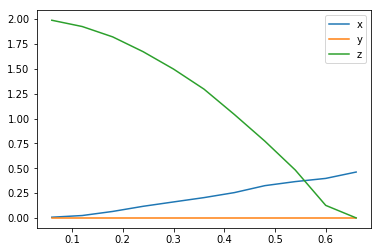

In [41]:
## TODO: Plot the rewards.
#Episode = 1000, score =  -5.127 (best =  -1.049)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label ='x')
plt.plot(results['time'], results['y'], label ='y')
plt.plot(results['time'], results['z'], label ='z')
plt.legend()
_ = plt.ylim()


In [37]:
import numpy as np
from physics_sim import PhysicsSim

test = Task(init_pose=None, init_velocities=None, 
        init_angle_velocities=None, runtime=5., target_pos=None)
print(test)
print(test[0])

TypeError: 'Task' object does not support indexing

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: